# Orthogonal Matrices

You might think that **invertible matrices** are the best around. After all, they are easy to manipulate and have many useful properties. But let us go a step further and construct even better matrices—ones that also take into account the **geometry of space**.

In this topic, you will begin studying **orthogonal matrices**, which are well known for their geometric behavior and their essential role in many important matrix decompositions. You will learn about their key properties as well as their geometric interpretation.

Prepare yourself for a significant step forward into more advanced concepts of linear algebra.


## Nice Matrices

Bases are fundamental because they reconstruct the entire space using the minimum necessary information. **Orthonormal bases** are even more powerful: their vectors point in mutually orthogonal directions and have unit length, which allows any vector to be described using simple **dot products** with the basis vectors.

Since invertible matrices—whose columns form a basis—are already very useful and easy to handle, it is natural to expect that matrices whose columns form an **orthonormal basis** enjoy even better properties. These special matrices are known as **orthogonal matrices**.

---

### Definition: Orthogonal Matrix

A square matrix $U$ of size $n$ is called an **orthogonal matrix** if its columns form an orthonormal basis of $\mathbb{R}^n$.

---

### First observations

- Because the columns of $U$ form a basis, the matrix $U$ is **invertible**.
- The canonical basis vectors form the columns of the identity matrix $I$, so the identity matrix is orthogonal.
- In general, constructing an orthogonal matrix is straightforward once an orthonormal basis is known.

---

### Example

Consider the set of vectors

$$
\left\{
\begin{pmatrix}
0 \\
1
\end{pmatrix},
\begin{pmatrix}
-1 \\
0
\end{pmatrix}
\right\}.
$$

These vectors form an orthonormal basis of $\mathbb{R}^2$. Placing them as columns of a matrix produces an orthogonal matrix:

$$
\begin{pmatrix}
0 & -1 \\
1 & \phantom{-}0
\end{pmatrix}.
$$

---

### How to recognize an orthogonal matrix

To determine whether a given matrix is orthogonal, you must check that its columns:

1. Form a basis
2. Are orthogonal to each other
3. Have norm equal to $1$

At first glance, verifying all these conditions may seem cumbersome. However, in the next section, you will learn a **simple and powerful test** that makes this verification extremely easy.

---

### Final remark

Since orthonormal bases are among the most well-behaved objects in linear algebra, it is no surprise that matrices built from them inherit exceptional properties. Matrices with orthonormal columns are, in many senses, the *best* matrices you can work with.

Convinced? Then keep reading.


## The Main Properties

What advantages do orthogonal matrices have? The following result condenses their most important properties. We will examine them one by one.

---

### Characterization of orthogonal matrices

The following conditions are **equivalent** to a matrix $U$ being orthogonal:

1.
   $$
   U U^T = I = U^T U,
   $$
   which implies
   $$
   U^T = U^{-1}.
   $$

2.
   $$
   \langle Uv, Uw \rangle = \langle v, w \rangle
   \quad \text{for all } v, w \in \mathbb{R}^n.
   $$

3.
   $$
   \|Uv\| = \|v\|
   \quad \text{for all } v \in \mathbb{R}^n.
   $$

---

### Why these properties matter

The first condition is often the most striking. Orthogonal matrices are invertible matrices whose **inverse is trivial to compute**: it is simply the transpose. In general, computing the inverse of a matrix is a difficult and error-prone task, so this property alone is extremely valuable.

This condition also provides a **simple test** to determine whether a matrix is orthogonal: multiply the matrix by its transpose and check whether the result is the identity matrix.

---

### Example

Consider the matrix

$$
U =
\begin{pmatrix}
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 \\
\frac{1}{\sqrt{2}} & \phantom{-}\frac{1}{\sqrt{2}} & 0 \\
0 & 0 & 1
\end{pmatrix}.
$$

Its transpose is

$$
U^T =
\begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 \\
-\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 \\
0 & 0 & 1
\end{pmatrix}.
$$

Now compute the product:

$$
U U^T
=
\frac{1}{2}
\begin{pmatrix}
1 & -1 & 0 \\
1 & \phantom{-}1 & 0 \\
0 & 0 & 2
\end{pmatrix}
\begin{pmatrix}
1 & 1 & 0 \\
-1 & 1 & 0 \\
0 & 0 & 2
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}
= I.
$$

Similarly, one can verify that

$$
U^T U = I.
$$

Hence,

$$
U^T = U^{-1},
$$

and therefore $U$ is an **orthogonal matrix**.

---

### Geometric interpretation

The remaining two properties have a strong geometric meaning:

- Orthogonal matrices **preserve inner products**, which means they preserve angles.
- Orthogonal matrices **preserve lengths**, so they do not stretch or shrink vectors.

These facts explain why orthogonal matrices play a central role in geometry, physics, and many matrix decompositions.

Let us now explore these geometric properties in more detail.


## The Geometry of Isometries

The linear operator $L_U$ associated with an orthogonal matrix $U$ has a remarkably simple and elegant behavior. The last two properties of orthogonal matrices can be rewritten as

$$
\langle L_U(v), L_U(w) \rangle = \langle v, w \rangle
$$

and

$$
\|L_U(v)\| = \|v\|
$$

for any $v, w \in \mathbb{R}^n$.

---

### Geometric meaning

- The first identity shows that $L_U$ **preserves angles** between vectors.
- The second identity shows that $L_U$ **preserves lengths** of vectors.

As a consequence, the action of $L_U$ does not distort the space. It neither stretches nor shrinks vectors, and it does not change angles.

Because of this behavior, you can think of $L_U$ as representing:
- a **rotation**,
- a **reflection**, or
- a **composition of rotations and reflections**.

In short:

> An orthogonal matrix acts like a rotation (possibly combined with a reflection).

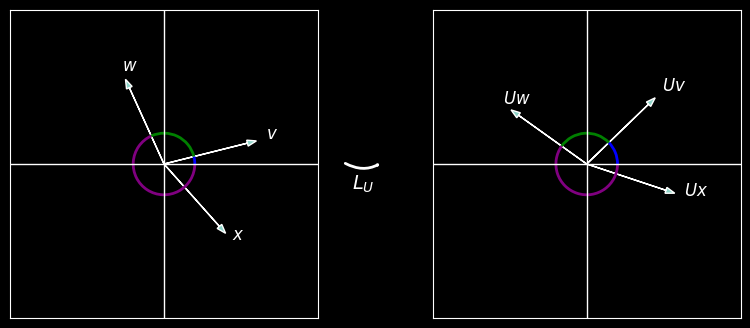

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Arc, FancyArrowPatch


def draw_axes(ax):
    ax.axhline(0, linewidth=1)
    ax.axvline(0, linewidth=1)
    ax.set_aspect('equal')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_xticks([])
    ax.set_yticks([])


def draw_vector(ax, v, label):
    ax.arrow(
        0, 0, v[0], v[1],
        head_width=0.08,
        length_includes_head=True
    )
    ax.text(v[0] * 1.1, v[1] * 1.1, label, fontsize=12)


def draw_angle(ax, theta1, theta2, color):
    arc = Arc(
        (0, 0),
        0.8, 0.8,
        angle=0,
        theta1=np.degrees(theta1),
        theta2=np.degrees(theta2),
        color=color,
        linewidth=2
    )
    ax.add_patch(arc)


# Original vectors
v = np.array([1.2, 0.3])
w = np.array([-0.5, 1.1])
x = np.array([0.8, -0.9])

# Orthogonal transformation (rotation)
theta = np.pi / 6
U = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

Uv, Uw, Ux = U @ v, U @ w, U @ x

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Left plot
draw_axes(axs[0])
draw_vector(axs[0], v, r"$v$")
draw_vector(axs[0], w, r"$w$")
draw_vector(axs[0], x, r"$x$")
draw_angle(axs[0], 0, np.arctan2(v[1], v[0]), "blue")
draw_angle(axs[0], np.arctan2(v[1], v[0]), np.arctan2(w[1], w[0]), "green")
draw_angle(axs[0], np.arctan2(w[1], w[0]), 0, "purple")

# Right plot
draw_axes(axs[1])
draw_vector(axs[1], Uv, r"$U v$")
draw_vector(axs[1], Uw, r"$U w$")
draw_vector(axs[1], Ux, r"$U x$")
draw_angle(axs[1], 0, np.arctan2(Uv[1], Uv[0]), "blue")
draw_angle(axs[1], np.arctan2(Uv[1], Uv[0]), np.arctan2(Uw[1], Uw[0]), "green")
draw_angle(axs[1], np.arctan2(Uw[1], Uw[0]), 0, "purple")

# Curved arrow between plots
arrow = FancyArrowPatch(
    (0.48, 0.5), (0.52, 0.5),
    transform=fig.transFigure,
    arrowstyle="->",
    connectionstyle="arc3,rad=0.3",
    linewidth=2
)
fig.add_artist(arrow)
fig.text(0.5, 0.43, r"$L_U$", ha="center", fontsize=14)

plt.show()




### Isometries

Linear operators that satisfy these equivalent properties are called **isometries**. Due to their rigid structure, isometries preserve the geometry of the space exactly. Unlike a general square matrix $A$, they do not introduce any deformation such as stretching, shrinking, or shearing.

---

### Preservation of orthogonality

One particularly important consequence of these properties is that **isometries preserve orthogonality**. If two vectors are orthogonal, their images under $L_U$ are also orthogonal.

Recall that invertible linear operators send bases to bases. Combining this fact with the properties above, we obtain a stronger result:

> Isometries transform **orthonormal bases** into **orthonormal bases**.

This geometric viewpoint explains why orthogonal matrices play a central role in linear algebra, geometry, physics, and numerical algorithms.


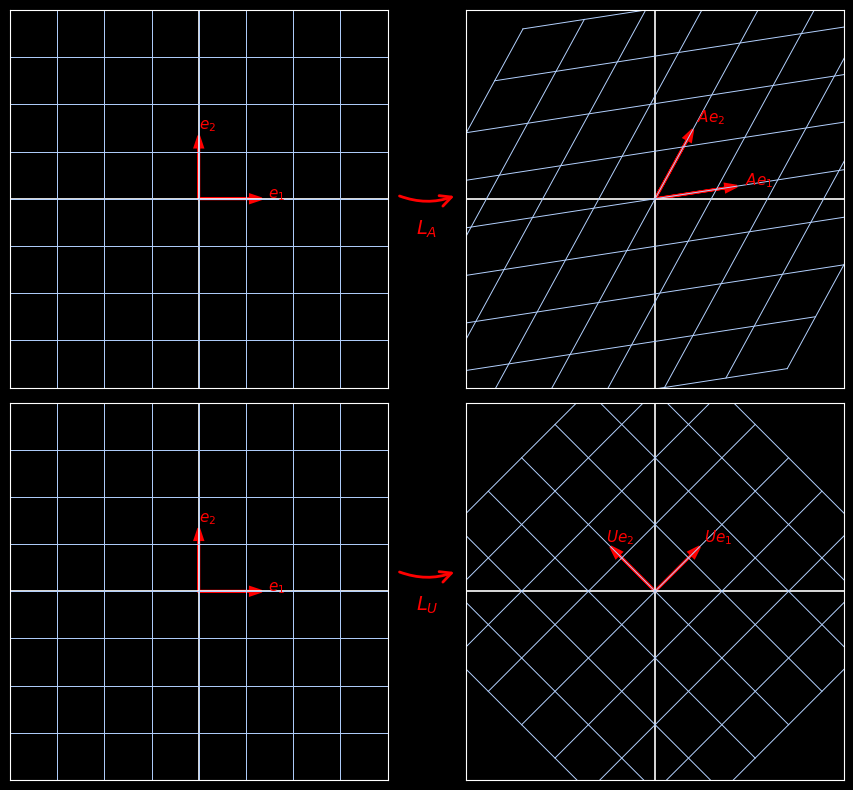

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch


def draw_axes(ax):
    ax.axhline(0, linewidth=1.2)
    ax.axvline(0, linewidth=1.2)
    ax.set_aspect("equal")
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_xticks([])
    ax.set_yticks([])


def draw_grid(ax, transform=None, color="#b3d1ff"):
    xs = np.linspace(-3, 3, 9)
    ys = np.linspace(-3, 3, 9)

    for x in xs:
        pts = np.array([[x, -3], [x, 3]])
        if transform is not None:
            pts = pts @ transform.T
        ax.plot(pts[:, 0], pts[:, 1], color=color, linewidth=0.7)

    for y in ys:
        pts = np.array([[-3, y], [3, y]])
        if transform is not None:
            pts = pts @ transform.T
        ax.plot(pts[:, 0], pts[:, 1], color=color, linewidth=0.7)


def draw_vector(ax, v, label):
    ax.arrow(
        0, 0, v[0], v[1],
        head_width=0.12,
        length_includes_head=True,
        linewidth=2,
        edgecolor="red",
        facecolor="red"
    )
    ax.text(v[0] * 1.1, v[1] * 1.1, label, fontsize=11, color="red")


# Basis vectors
e1 = np.array([1, 0])
e2 = np.array([0, 1])

# Linear (non-orthogonal) map
A = np.array([[1.3, 0.6],
              [0.2, 1.1]])

# Orthogonal map (rotation)
theta = np.pi / 4
U = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# --- Top-left: original basis ---
draw_axes(axs[0, 0])
draw_grid(axs[0, 0])
draw_vector(axs[0, 0], e1, r"$e_1$")
draw_vector(axs[0, 0], e2, r"$e_2$")

# --- Top-right: A applied ---
draw_axes(axs[0, 1])
draw_grid(axs[0, 1], transform=A)
draw_vector(axs[0, 1], A @ e1, r"$A e_1$")
draw_vector(axs[0, 1], A @ e2, r"$A e_2$")

# --- Bottom-left: original basis ---
draw_axes(axs[1, 0])
draw_grid(axs[1, 0])
draw_vector(axs[1, 0], e1, r"$e_1$")
draw_vector(axs[1, 0], e2, r"$e_2$")

# --- Bottom-right: U applied ---
draw_axes(axs[1, 1])
draw_grid(axs[1, 1], transform=U)
draw_vector(axs[1, 1], U @ e1, r"$U e_1$")
draw_vector(axs[1, 1], U @ e2, r"$U e_2$")

# Curved arrows + labels
arrow_A = FancyArrowPatch(
    (0.47, 0.75), (0.53, 0.75),
    transform=fig.transFigure,
    arrowstyle="->",
    connectionstyle="arc3,rad=0.2",
    linewidth=2,
    edgecolor="red",
    facecolor="red",
    mutation_scale=20
)
fig.add_artist(arrow_A)
fig.text(0.50, 0.70, r"$L_A$", ha="center", fontsize=14, color="red")

arrow_U = FancyArrowPatch(
    (0.47, 0.28), (0.53, 0.28),
    transform=fig.transFigure,
    arrowstyle="->",
    connectionstyle="arc3,rad=0.2",
    linewidth=2,
    edgecolor="red",
    facecolor="red",
    mutation_scale=20
)
fig.add_artist(arrow_U)
fig.text(0.50, 0.23, r"$L_U$", ha="center", fontsize=14, color="red")

plt.tight_layout()
plt.show()


## Importance

With everything you have learned so far, it is now possible to clearly compare **orthogonal matrices** with general **invertible matrices**.

- For an orthogonal matrix, not only does the inverse exist, but it can be computed effortlessly:
  $$
  U^{-1} = U^T.
  $$

- When vectors are transformed using a general invertible matrix, it is often difficult to understand how their lengths and angles change. In contrast, an orthogonal matrix preserves both **lengths** and **angles**, so the transformed vectors retain the same geometric relationships as the original ones.

- The geometric behavior of a generic invertible matrix can be complex and unintuitive. Orthogonal matrices, however, always produce **rigid transformations** of space, such as rotations and reflections.

---

### Why orthogonal matrices matter

Because of their simple, stable, and fully controlled behavior, orthogonal matrices are among the easiest non-trivial matrices to manipulate. This makes them fundamental building blocks in many important **matrix decompositions**, which express complicated matrices as products of simpler ones.

Some of the most significant decompositions involving orthogonal matrices include:

- **Spectral decomposition**
- **Polar decomposition**

These decompositions can be used, for example, to compute matrix square roots or to simplify equations describing conic sections.

However, the most important and widely used decomposition is the **Singular Value Decomposition (SVD)**. In SVD, orthogonal matrices play a central and indispensable role, making them essential tools across mathematics, physics, data science, and machine learning.


## Conclusion

Let us review the key concepts covered so far. For this purpose, consider a matrix $U$ of size $n \times n$.

- The matrix $U$ is **orthogonal** if its columns form an **orthonormal basis**.

- For any orthogonal matrix, the inverse is easy to compute:

  $$
  U^T = U^{-1}.
  $$

- Orthogonal matrices **preserve angles and lengths**. For every $v, w \in \mathbb{R}^n$, we have

  $$
  \langle Uv, Uw \rangle = \langle v, w \rangle
  $$
  and
  $$
  \|Uv\| = \|v\|.
  $$

- The linear operators associated with orthogonal matrices exhibit a **rigid behavior** and are known as **isometries**.

- Orthogonal matrices play a crucial role in **matrix decompositions**, most notably in the **singular value decomposition (SVD)**.
